## WeRateDog Tweets Analysis

This report explains my investigation on the WeRateDogs twitter account feeds and how most of their tweets performed, I also tried to analsye the most rated dogs by breeds as well as top rated dogs and least rated dogs.

Based on my analysis of the data, these are my observation: 
- Lakeland_terrier breed was the most favorite dog, the dog featured in a tweet with id 822872901745569793 which generated the highest likes count of 132,810 likes making it the most liked dogs on the tweeted account feed

- Labrador_retriever also appear to be the most retweeted dog with tweet the dog breed faturing in a tweet with id 744234799360020481 which generated 79,515 retweet counts.

In [1]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

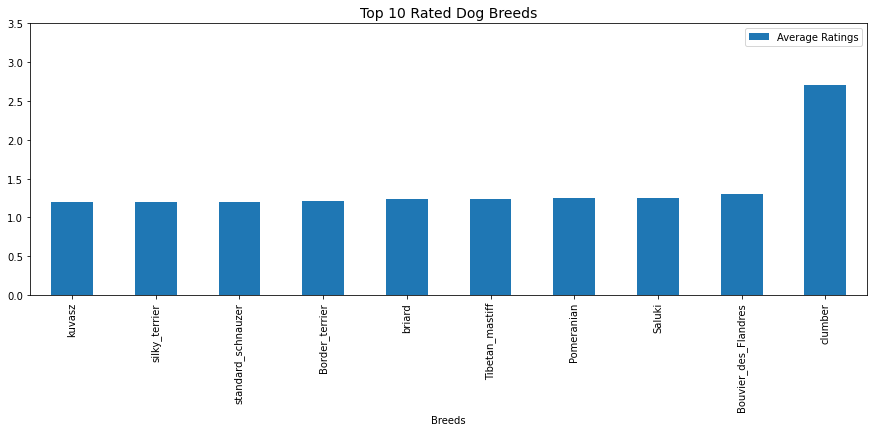

In [2]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
dog_ratings = twitter_archive_master.query('breed == breed')[['ratings', 'breed']].groupby('breed').mean()
dog_ratings.sort_values(by=['ratings']).tail(10).plot.bar(figsize=(15,5))
plt.ylim(top = 3.5)
plt.title("Top 10 Rated Dog Breeds",{'fontsize': 14})
plt.xlabel("Breeds")
plt.legend(["Average Ratings"])

Based on the figure above, the dog breed with highest rating was the **Dumber** breed with the breed recording average ratings above 2.5, this is significantly higher that other other dog breeds with the closest one being the **Bouvier_des_Flandres** breed with average rating of around 1.5, third highest rated breeds wasa **Saluki** breed. The remaining top rated dogs includes Pomeranian, Tibetan_mastiff, Briard, Border_terrier, Standard_schnauzer, Silky_terrir and Kuvasz.

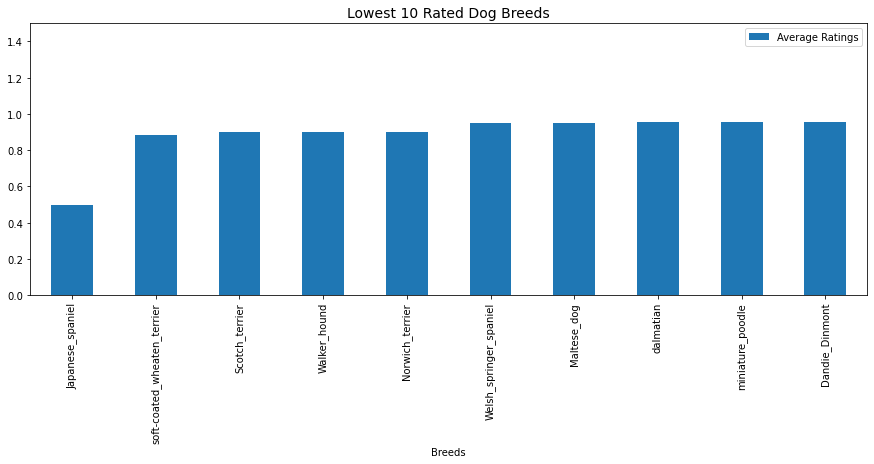

In [3]:
dog_ratings.sort_values(by=['ratings']).head(10).plot.bar(figsize=(15,5))
plt.ylim(top = 1.5)
plt.title("Lowest 10 Rated Dog Breeds",{'fontsize': 14})
plt.xlabel("Breeds")
plt.legend(["Average Ratings"])

Based on the bar graph above, the dog breed with the lowest average ratings was the **Japanese_Spaniel** breed which received average ratings around 0.5. This ratings is very low considering that the other breeds in the Lowest 10 lowest 10 rated dogs still managed to receive ratings between 0.9 and 1.0. The second lowest rated dog breed was the **Soft-coated_wheaten_terrier** breed with average ratings aroun 0.9 followed by **Scotch_terrier** with average ratings around 0.9 as well.

It also appears like most of the least rated dogs appears to be in similar rating clusters close to 1.0

In [6]:
dog_stage = twitter_archive_master.dog_age_stage.value_counts()
dog_stage

None             1688
pupper,None       203
doggo              63
puppo,None         22
pupper,doggo        9
floofer,None        7
floofer,doggo       1
puppo,doggo         1
Name: dog_age_stage, dtype: int64

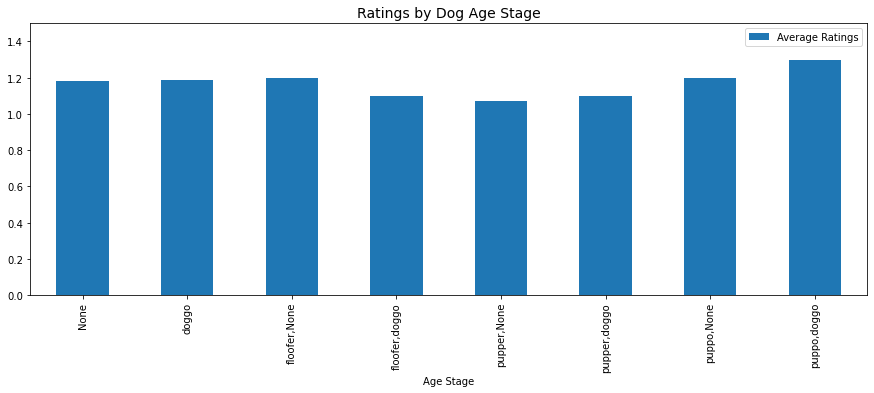

In [5]:
dog_stage_ratings = twitter_archive_master.query('dog_age_stage == dog_age_stage')[['ratings', 'dog_age_stage']].groupby('dog_age_stage').mean()
dog_stage_ratings.sort_values(by=['dog_age_stage']).plot.bar(figsize=(15,5))
plt.ylim(top = 1.5)
plt.title("Ratings by Dog Age Stage",{'fontsize': 14})
plt.xlabel("Age Stage")
plt.legend(["Average Ratings"])

From the graph above, **puppo,doggo** is the dog class (age stage) with the highest rating with the class recording an average rating of around 1.3, this was followed by the **puppo** average rating of ober 1.2. **pupper** appears to be the dog class with the lowest average rating of 1.1. 

It is also worth noting that some of the dogs didnot have any record of dog class and was categorised as **None** in the graph. There was a total of 1688 rows with no dog class while **puppo,doggo** which happens to be the highest rated dog class has only one entry as a dog class.

#### Limitations
- The dog age stage has too many NaN values hence it is very difficult to have a realistic insight on the most rated dogs by age stage.
- Data is scattered in different formats and had to be programmatically merged.
- There are too many null values in the data, making some of the columns unusable for the analysis.